In [1]:
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.contrib.eager as tfe

In [2]:
tf.enable_eager_execution()

In [3]:
tf.__version__

'1.10.0'

In [4]:
tf.executing_eagerly()

True

## Get Dataset

### Download Data

In [5]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"
dataset_filepath = tf.keras.utils.get_file(os.path.basename(train_dataset_url), origin=train_dataset_url)

dataset_filepath

'/home/ec2-user/.keras/datasets/iris_training.csv'

### Inspect Data

In [6]:
!head -n5 {dataset_filepath}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [7]:
feature_names = ['sepal_length', 'sepal_width',  'petal_length', 'petal_width']

label_name = ['species']
columns = feature_names + label_name
columns


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [8]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
class_names

['Iris setosa', 'Iris versicolor', 'Iris virginica']

### Create Dataset

In [9]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(dataset_filepath, batch_size, column_names=columns, label_name=label_name[0],
    num_epochs=1)
train_dataset

<PrefetchDataset shapes: (OrderedDict([(sepal_length, (?,)), (sepal_width, (?,)), (petal_length, (?,)), (petal_width, (?,))]), (?,)), types: (OrderedDict([(sepal_length, tf.float32), (sepal_width, tf.float32), (petal_length, tf.float32), (petal_width, tf.float32)]), tf.int32)>

In [10]:
features, labels = next(iter(train_dataset))
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=60, shape=(32,), dtype=float32, numpy=
              array([4.4, 6.7, 5.7, 6.4, 5. , 5. , 6.9, 5.8, 6.9, 5.1, 6.7, 5.7, 6. ,
                     5. , 6.2, 6.5, 5.5, 6.6, 6.1, 6.9, 4.8, 5.4, 4.4, 5.5, 5.8, 5.1,
                     7.4, 5.8, 6.7, 6.8, 6. , 4.9], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=61, shape=(32,), dtype=float32, numpy=
              array([2.9, 3. , 2.9, 3.1, 3.4, 3.6, 3.1, 2.8, 3.1, 3.8, 3.1, 2.8, 2.2,
                     3.2, 2.8, 3. , 2.4, 3. , 2.8, 3.2, 3.1, 3. , 3.2, 3.5, 2.7, 3.7,
                     2.8, 2.6, 3. , 3.2, 2.7, 3.1], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
              array([1.4, 5. , 4.2, 5.5, 1.5, 1.4, 5.1, 5.1, 4.9, 1.5, 5.6, 4.5, 5. ,
                     1.2, 4.8, 5.8, 3.8, 4.4, 4.7, 5.7, 1.6, 4.5, 1.3, 1.3, 5.1, 1.5,
                     6.1, 4. , 5.2, 5.9, 5.1, 1.5],

In [11]:
labels

<tf.Tensor: id=62, shape=(32,), dtype=int32, numpy=
array([0, 1, 1, 2, 0, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1,
       0, 0, 2, 0, 2, 1, 2, 2, 1, 0], dtype=int32)>

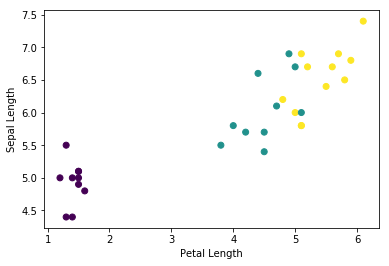

In [12]:
# graph some features, sepal length as a function of petal length
plt.scatter(features['petal_length'], features['sepal_length'], c=labels)
plt.xlabel("Petal Length")
plt.ylabel("Sepal Length")
plt.show()

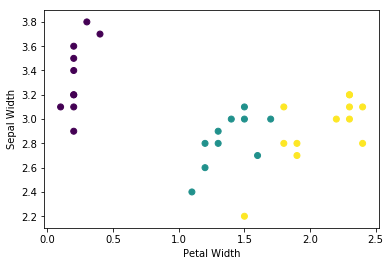

In [13]:
# sepal width as a function of petal width
plt.scatter(features['petal_width'], features['sepal_width'], c=labels)
plt.xlabel("Petal Width")
plt.ylabel("Sepal Width")
plt.show()

In [14]:
# method to pack features into a single array
def pack_features_vector(features, labels):
    features = tf.stack(list(features.values()), axis=1)
    return features, labels

In [15]:
train_dataset = train_dataset.map(pack_features_vector)
train_dataset

<MapDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

In [16]:
features, labels = next(iter(train_dataset))
features

<tf.Tensor: id=149, shape=(32, 4), dtype=float32, numpy=
array([[6.5, 3. , 5.2, 2. ],
       [4.9, 3.1, 1.5, 0.1],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 4.9, 1.5],
       [4.7, 3.2, 1.3, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [6.4, 2.8, 5.6, 2.1],
       [6.3, 2.5, 5. , 1.9],
       [7.9, 3.8, 6.4, 2. ],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 2.7, 3.9, 1.4],
       [4.9, 2.5, 4.5, 1.7],
       [6.9, 3.1, 5.1, 2.3],
       [5. , 3.4, 1.6, 0.4],
       [4.6, 3.1, 1.5, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 3.3, 6. , 2.5],
       [6. , 2.7, 5.1, 1.6],
       [5.8, 2.7, 5.1, 1.9],
       [4.9, 3. , 1.4, 0.2],
       [6. , 2.2, 5. , 1.5],
       [6.3, 2.3, 4.4, 1.3],
       [7.7, 3. , 6.1, 2.3],
       [6.5, 3. , 5.8, 2.2],
       [6. , 3. , 4.8, 1.8],
       [5.4, 3.9, 1.3, 0.4]], dtype=float32)

## Select Type of Model

Train a neural network.

### Create Model

In [17]:
model = tf.keras.models.Sequential([
    # input_shape is required
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])
model

### Use Model

In [18]:
predictions = model(features)
# a prediction is a "logit" for each class
predictions

<tf.Tensor: id=235, shape=(32, 3), dtype=float32, numpy=
array([[1.0480794 , 1.1626759 , 0.47564754],
       [0.4892422 , 1.0435159 , 0.32138395],
       [0.8259181 , 1.0037003 , 0.3951026 ],
       [0.9680184 , 1.1103592 , 0.45702478],
       [0.50627756, 1.0431877 , 0.32224953],
       [1.228515  , 1.6151237 , 0.5574811 ],
       [1.0283916 , 1.2388711 , 0.4800216 ],
       [0.9663143 , 0.8342975 , 0.41486016],
       [1.2164711 , 1.6897619 , 0.57823205],
       [0.53633046, 1.123119  , 0.33459383],
       [0.8407099 , 1.0769621 , 0.3874837 ],
       [0.83359045, 1.3497467 , 0.3759678 ],
       [1.1169332 , 0.97069615, 0.47865623],
       [0.5897798 , 1.1199688 , 0.35446075],
       [0.5136192 , 1.0621033 , 0.32164896],
       [0.5156456 , 1.0436144 , 0.32384974],
       [0.5853354 , 1.2205501 , 0.3853442 ],
       [0.75829107, 0.9128301 , 0.36644068],
       [0.6673647 , 1.3566594 , 0.39469594],
       [0.54770195, 1.2404133 , 0.33744112],
       [0.9685263 , 1.5019716 , 0.44364345]

In [19]:
# convert prediction logits to probabilities
tf.nn.softmax(predictions)

<tf.Tensor: id=237, shape=(32, 3), dtype=float32, numpy=
array([[0.37236005, 0.41757232, 0.21006761],
       [0.2788506 , 0.4853886 , 0.23576084],
       [0.3515502 , 0.4199496 , 0.2285002 ],
       [0.36325744, 0.41882473, 0.21791784],
       [0.28227654, 0.48289412, 0.23482938],
       [0.33521497, 0.49342987, 0.1713551 ],
       [0.35559845, 0.4389044 , 0.20549715],
       [0.40775752, 0.35732862, 0.23491377],
       [0.31913298, 0.512294  , 0.16857299],
       [0.27658582, 0.49735782, 0.2260564 ],
       [0.34458187, 0.43641075, 0.2190074 ],
       [0.30226448, 0.50646675, 0.1912688 ],
       [0.41803315, 0.36116093, 0.22080585],
       [0.28656808, 0.48695177, 0.22648008],
       [0.28121808, 0.48668376, 0.23209813],
       [0.28401342, 0.48154044, 0.23444606],
       [0.2698207 , 0.5092669 , 0.22091244],
       [0.35175037, 0.41053486, 0.23771474],
       [0.266407  , 0.53076535, 0.20282765],
       [0.26250154, 0.5247743 , 0.2127241 ],
       [0.30335936, 0.5171658 , 0.1794749 ]

In [20]:
# model is untrained and not very good
# predicted labels/classes
tf.argmax(predictions, axis=1)

<tf.Tensor: id=240, shape=(32,), dtype=int64, numpy=
array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1])>

In [21]:
# actual labels
labels

<tf.Tensor: id=150, shape=(32,), dtype=int32, numpy=
array([2, 0, 1, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1,
       2, 1, 2, 0, 2, 1, 2, 2, 2, 0], dtype=int32)>

## Train Model

### Loss and Gradient Function

In [22]:
def loss(model, features, labels):
    logits = model(features)
    return tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

loss

<function __main__.loss(model, features, labels)>

In [23]:
loss(model, features, labels)

<tf.Tensor: id=288, shape=(), dtype=float32, numpy=1.3431419>

In [24]:
def grad(model, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss(model, features, labels)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

grad

<function __main__.grad(model, features, labels)>

### Optimizer

Stochastic Gradient Descent

In [25]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer

In [26]:
global_step = tfe.Variable(0)
global_step

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=0>

In [27]:
# a single optimization step
loss_value, grads = grad(model, features, labels)

# global step and initial loss
global_step.numpy(), loss_value.numpy()

(0, 1.3431419)

In [28]:
optimizer.apply_gradients(zip(grads, model.variables), global_step)

# step, loss
global_step.numpy(), loss(model, features, labels).numpy()

(1, 1.2855874)

### Training Loop

In [29]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
    
    epoch_loss_avg = tfe.metrics.Mean()
    epoch_accuracy = tfe.metrics.Accuracy()
    
    # training loop in batches
    
    for x, y in train_dataset:
        
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.variables), global_step)
        
        epoch_loss_avg(loss_value)
        epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
        
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())
    
    if epoch % 10 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch, epoch_loss_avg.result(), epoch_accuracy.result()))

Epoch 000: Loss: 1.224, Accuracy: 10.000%
Epoch 010: Loss: 1.048, Accuracy: 32.500%
Epoch 020: Loss: 0.997, Accuracy: 45.833%
Epoch 030: Loss: 0.929, Accuracy: 66.667%
Epoch 040: Loss: 0.833, Accuracy: 69.167%
Epoch 050: Loss: 0.729, Accuracy: 70.000%
Epoch 060: Loss: 0.642, Accuracy: 70.000%
Epoch 070: Loss: 0.576, Accuracy: 70.000%
Epoch 080: Loss: 0.531, Accuracy: 70.000%
Epoch 090: Loss: 0.481, Accuracy: 70.000%
Epoch 100: Loss: 0.459, Accuracy: 70.000%
Epoch 110: Loss: 0.433, Accuracy: 74.167%
Epoch 120: Loss: 0.404, Accuracy: 76.667%
Epoch 130: Loss: 0.386, Accuracy: 85.000%
Epoch 140: Loss: 0.362, Accuracy: 91.667%
Epoch 150: Loss: 0.351, Accuracy: 90.833%
Epoch 160: Loss: 0.328, Accuracy: 89.167%
Epoch 170: Loss: 0.302, Accuracy: 94.167%
Epoch 180: Loss: 0.268, Accuracy: 96.667%
Epoch 190: Loss: 0.265, Accuracy: 95.000%
Epoch 200: Loss: 0.237, Accuracy: 95.833%


### Visualize Loss

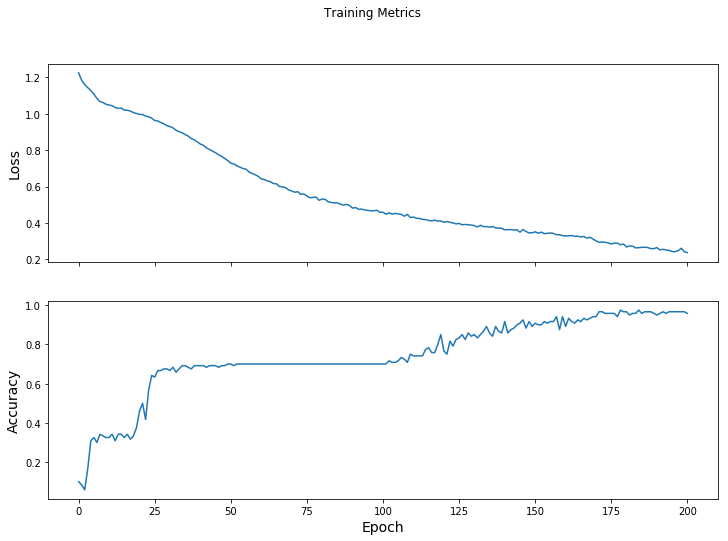

In [30]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle("Training Metrics")

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
_ = axes[1].plot(train_accuracy_results)

## Evaluate Model

### Test Dataset

In [31]:
test_data_url = "http://download.tensorflow.org/data/iris_test.csv"
test_data_filepath = tf.keras.utils.get_file(fname=os.path.basename(test_data_url), origin=test_data_url)

test_data_filepath

'/home/ec2-user/.keras/datasets/iris_test.csv'

In [32]:
test_dataset = tf.contrib.data.make_csv_dataset(test_data_filepath, batch_size, column_names=columns, label_name="species",
    num_epochs=1, shuffle=False)
test_dataset = test_dataset.map(pack_features_vector)
test_dataset

<MapDataset shapes: ((?, 4), (?,)), types: (tf.float32, tf.int32)>

### Evaluate Model against Test Dataset

In [33]:
test_accuracy = tfe.metrics.Accuracy()

for (x, y) in test_dataset:
    logits = model(x)
    prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)
    
test_accuracy.result().numpy()

1.0

In [34]:
# view labels compared to predicted labels
tf.stack([y, prediction], axis=1)

<tf.Tensor: id=115293, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

## Make Predictions

In [35]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])
predictions = model(predict_dataset)

predictions

<tf.Tensor: id=115309, shape=(3, 3), dtype=float32, numpy=
array([[ 4.2145777,  0.6997049, -4.5434365],
       [-2.1305463,  1.9433603,  0.8076973],
       [-4.1149616,  2.0047932,  2.2867265]], dtype=float32)>

In [36]:
for i, logits in enumerate(predictions):
    
    class_idx = tf.argmax(logits).numpy()
    p = tf.nn.softmax(logits)[class_idx]
    name = class_names[class_idx]
    
    print (i, name, 100*p.numpy())

0 Iris setosa 97.09597826004028
1 Iris versicolor 74.72613453865051
2 Iris virginica 56.94816708564758
